In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [17]:
df = pd.read_csv('VOF.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/28/2017,321.75,327.75,321.75,326.00,287.054138,225484
1,12/29/2017,328.50,332.00,328.50,331.75,292.117218,119323
2,1/2/2018,333.00,342.00,330.00,342.00,301.142731,462504
3,1/3/2018,340.00,355.00,339.00,352.00,309.948059,399462
4,1/4/2018,356.00,356.00,347.00,350.00,308.187012,747238


In [18]:
df.shape

(1262, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1262 non-null   object 
 1   Open       1262 non-null   float64
 2   High       1262 non-null   float64
 3   Low        1262 non-null   float64
 4   Close      1262 non-null   float64
 5   Adj Close  1262 non-null   float64
 6   Volume     1262 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.1+ KB


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,387.590581,391.191154,384.134208,387.623811,364.962926,3.339802e+05
std,74.241060,75.107558,73.476334,74.004481,81.021720,4.508475e+05
min,218.000000,221.500000,202.000000,214.000000,197.895157,2.929000e+03
25%,330.500000,333.000000,328.000000,331.000000,302.442520,1.209085e+05
50%,348.000000,350.000000,345.000000,348.250000,314.381821,2.172085e+05
75%,459.000000,461.500000,455.249512,459.375000,443.243073,3.772195e+05
max,545.000000,551.000000,536.000000,545.000000,530.034790,6.866618e+06


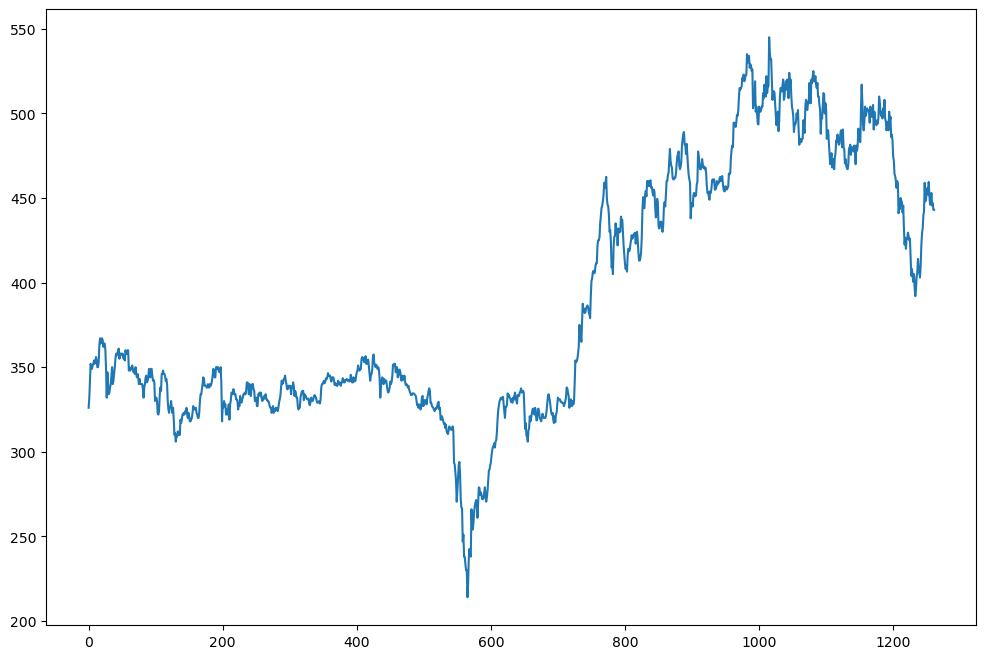

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Close Price History')

In [22]:
train_length = int(len(df)*0.8)
train=df.iloc[:train_length]
test=df.iloc[train_length:]
print(train.shape,test.shape)

(1009, 7) (253, 7)


In [23]:
features = ['Open','High','Low','Volume']
target = 'Close'
X_train = train[features].values.reshape(-1, len(features))
y_train = train[target].values
X_test = test[features].values.reshape(-1, len(features))
y_test = test[target].values

In [24]:
print(X_train.shape)
print(X_test.shape)

(1009, 4)
(253, 4)


In [25]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

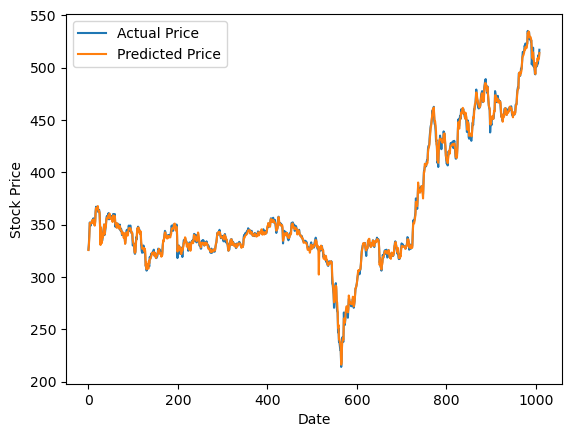

In [27]:
#Train set graph
plt.plot(y_train, label='Actual Price')
plt.plot(train_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

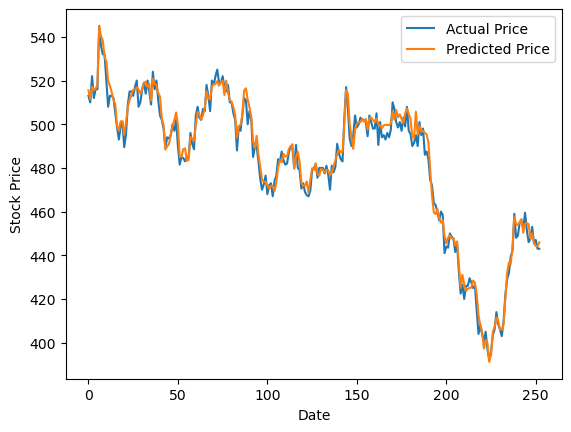

In [28]:
#test set graph
plt.plot(y_test, label='Actual Price')
plt.plot(test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()